In [8]:
from IPython.display import display
import ipywidgets as widgets
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [23]:
# -*- coding: utf-8 -*-

import networkx as nx
from networkx.algorithms.flow.utils import *

__all__ = ['edmonds_karp']


def edmonds_karp_core(R, s, t, cutoff):
    """Implementation of the Edmonds-Karp algorithm.
    """
    R_nodes = R.nodes
    R_pred = R.pred
    R_succ = R.succ

    inf = R.graph['inf']

    def augment(path):
        """Augment flow along a path from s to t.
        """
        # Determine the path residual capacity.
        flow = inf
        it = iter(path)
        u = next(it)
        for v in it:
            attr = R_succ[u][v]
            #print(attr)   
            flow = min(flow, attr['capacity'] - attr['flow'])
            #print(flow)
            u = v
        if flow * 2 > inf:
            raise nx.NetworkXUnbounded(
                'Infinite capacity path, flow unbounded above.')
        # Augment flow along the path.
        it = iter(path)
        print("Path: ",path,"Flow: ",flow)
        flow_s ="f = "+str(flow)
        i = 0
#         while True:
#             print(path[i])
#             if path[i]==7:
#                 break
            #print((G.get_edge_data(path[i],path[i+1]))['capacity'])
            #i+=1
        
        pos = nx.spring_layout(G)
        plt.figure()
        #nx.add_path(G,path,)
        #print(labels)
        #labels = nx.get_edge_attributes(G,'labels')
        nx.draw_networkx(G,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='pink',alpha=0.9,labels={node:node for node in path})
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='red')
        #plt.savefig("file.png", format="PNG")
        plt.show()
        u = next(it)
        for v in it:
            R_succ[u][v]['flow'] += flow
            R_succ[v][u]['flow'] -= flow
            u = v
        return flow

    def bidirectional_bfs():
        """Bidirectional breadth-first search for an augmenting path.
        """
        pred = {s: None}
        q_s = [s]
        succ = {t: None}
        q_t = [t]
        while True:
            q = []
            if len(q_s) <= len(q_t):
                for u in q_s:
                    for v, attr in R_succ[u].items():
                        if v not in pred and attr['flow'] < attr['capacity']:
                            pred[v] = u
                            if v in succ:
                                return v, pred, succ
                            q.append(v)
                if not q:
                    return None, None, None
                q_s = q
            else:
                for u in q_t:
                    for v, attr in R_pred[u].items():
                        if v not in succ and attr['flow'] < attr['capacity']:
                            succ[v] = u
                            if v in pred:
                                return v, pred, succ
                            q.append(v)
                if not q:
                    return None, None, None
                q_t = q

    # Look for shortest augmenting paths using breadth-first search.
    flow_value = 0
    while flow_value < cutoff:
        v, pred, succ = bidirectional_bfs()
        if pred is None:
            break
        path = [v]
        # Trace a path from s to v.
        u = v
        while u != s:
            u = pred[u]
            path.append(u)
        path.reverse()
        # Trace a path from v to t.
        u = v
        while u != t:
            u = succ[u]
            path.append(u)
        flow_value += augment(path)

    return flow_value


def edmonds_karp_impl(G, s, t, capacity, residual, cutoff):
    """Implementation of the Edmonds-Karp algorithm.
    """
    if s not in G:
        raise nx.NetworkXError('node %s not in graph' % str(s))
    if t not in G:
        raise nx.NetworkXError('node %s not in graph' % str(t))
    if s == t:
        raise nx.NetworkXError('source and sink are the same node')

    if residual is None:
        R = build_residual_network(G, capacity)
    else:
        R = residual

    # Initialize/reset the residual network.
    for u in R:
        for e in R[u].values():
            e['flow'] = 0

    if cutoff is None:
        cutoff = float('inf')
    R.graph['flow_value'] = edmonds_karp_core(R, s, t, cutoff)

    return R
    
def edmonds_karp2(G, s, t, capacity='capacity', residual=None, value_only=False,cutoff=None):
    R = edmonds_karp_impl(G, s, t, capacity, residual, cutoff)
    R.graph['algorithm'] = 'edmonds_karp'
    return R

In [24]:
import networkx as nx
G = nx.DiGraph()
G.add_edge(1, 2, labels="20", capacity=20)
G.add_edge(1, 3, labels="22", capacity=22)
G.add_edge(2, 3, labels="13", capacity=13)
G.add_edge(2, 4, labels="8", capacity=8)
G.add_edge(2, 5, labels="11", capacity=11)
G.add_edge(3, 4, labels="15", capacity=15)
G.add_edge(3, 6, labels="16", capacity=16)
G.add_edge(4, 5, labels="12", capacity=12)
G.add_edge(4, 6, labels="8", capacity=8)
G.add_edge(4, 7, labels="17", capacity=17)
G.add_edge(5, 7, labels="15", capacity=15)
G.add_edge(6, 7, labels="22", capacity=22)

In [25]:
import matplotlib.pyplot as plt
from networkx.classes.function import info

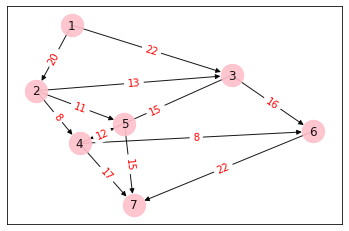

In [26]:
pos = nx.spring_layout(G)
plt.figure()
labels = nx.get_edge_attributes(G,'labels')
nx.draw_networkx(G,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='pink',alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='red')
plt.savefig("file.png", format="PNG")
plt.show()

Path:  [1, 2, 4, 7] Flow:  8


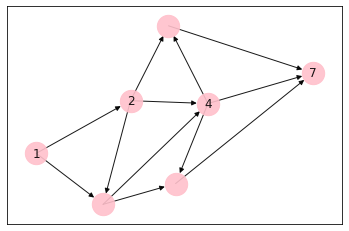

Path:  [1, 2, 5, 7] Flow:  11


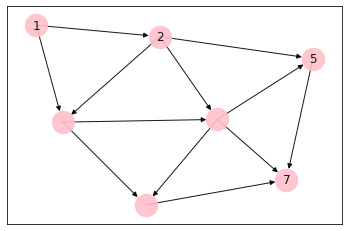

Path:  [1, 3, 4, 7] Flow:  9


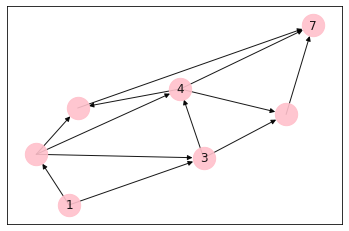

Path:  [1, 3, 6, 7] Flow:  13


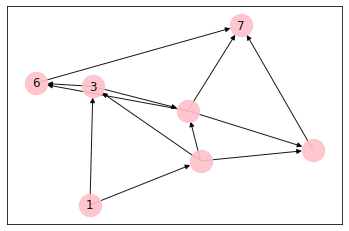

Path:  [1, 2, 3, 6, 7] Flow:  1


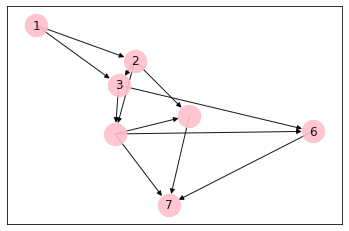

42


In [29]:
R = edmonds_karp2(G,1,7)
# pos = nx.spring_layout(R)
# plt.figure()
# nx.draw(R,pos,edge_color='black',width=1,linewidths=1,\
# node_size=500,node_color='pink',alpha=0.9,\
# labels={node:node for node in R.nodes()})
# nx.draw_networkx_edge_labels(R,pos,edge_labels=labels,font_color='red')
# plt.show()
# for u in R:
#     for e in R[u].values():
#         if(e['flow']>=0):
#             print(e)
print(R.graph['flow_value'])

In [33]:
pos = nx.spring_layout(G)
plt.figure()
#nx.add_path(G,path,)
#print(labels)
labels = nx.get_edge_attributes(R,'flow')
nx.draw_networkx(G,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='pink',alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='red')
plt.savefig("file.png", format="PNG")
plt.show()

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

<Figure size 432x288 with 0 Axes>